__Exercise 1.1__ (10 pts)

Recall that surrogate losses for large margin classification take the form, $\phi(y_i x_i^\top \beta)$ where $y_i \in \{-1,1\}$ and $\beta, x_i \in \mathbb R^p$.

The following functions are used as surrogate losses for large margin classification.  Demonstrate if they are convex or not, and follow the instructions.

1. exponential loss: $\phi(x) = e^{-x}$
1. truncated quadratic loss: $\phi(x) = (\max\{1-x,0\})^2$
1. hinge loss: $\phi(x) = \max\{1-x,0\}$
1. sigmoid loss: $\phi(x) = 1 - \tanh(\kappa x)$, for fixed $\kappa > 0$
1. Plot these as a function of $x$.

(This problem is due to notes of Larry Wasserman.) 


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn.linear_model as skl_lm

%matplotlib inline

In [2]:
x = np.arange(-10.0, 20.0, 0.1)
x1 = np.arange(-4.0, 20.0, 0.1)
y1 = np.exp(-x1)
y2 = np.array([(1-i)**2 if 1-i >0 else 0 for i in x])
y3 = np.array([1-i if 1-i >0 else 0 for i in x])
y4 = 1- np.tanh(x)

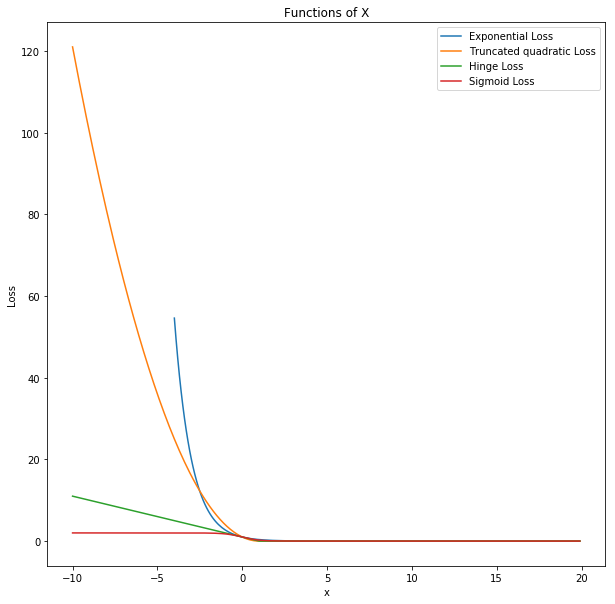

In [3]:
plt.figure(figsize=(10,10))
plt.plot(x1,y1, label = 'Exponential Loss')
plt.plot(x,y2, label = 'Truncated quadratic Loss')
plt.plot(x,y3, label = 'Hinge Loss')
plt.plot(x,y4, label = 'Sigmoid Loss')
plt.xlabel('x')
plt.ylabel('Loss')
plt.title('Functions of X');
plt.legend()
plt.show()

__Exercise 1.2__ (20 pts)

Consider the truncated quadratic loss from (1.1.2).  For brevity let $a_+ = max\{a,0\}$ denote the positive part of $a$.

$$\ell(y_i,x_i,\beta) = \phi(y_i x_i^\top \beta) = [(1-y_i x_i^\top \beta)_+]^2$$

1. Consider the empirical risk, $R_n$ (the average loss over a training set) for the truncated quadratic loss.  What is gradient of $R_n$ in $\beta$?  Does it always exists?
1. Demonstrate that the gradient does not have continuous derivative everywhere.
1. Recall that support vector machines used the hinge loss $(1 - y_i x_i^\top)_+$ with a ridge regularization.  Write the regularized optimization method for the truncated quadratic loss, and derive the gradient of the regularized empirical risk.
1. Because the loss does not have continuous Hessian, instead of the Newton method, we will use a quasi-Newton method that replaces the Hessian with a quasi-Hessian (another matrix that is meant to approximate the Hessian).  Consider the following quasi-Hessian of the regularized objective to be $$G(\beta) = \frac 1n \sum_i 2 (x_i x_i^\top 1\{ 1 > y_i x_i^T \beta \}) + 2 \lambda.$$  Demonstrate that the quasi-Hessian is positive definite, and write pseudo-code for quasi-Newton optimization.

__For the answers of Exercise 1.2, please check the last page.__

__Exercise 1.3__ (20 pts)

1. Consider a high-dimensional embedding, $Z = \Phi(X)$ for the points and apply principal kernel analysis, consider the kernel matrix, how is its spectral decomposition related to the SVD of $Z$?  Suppose that we would like to have obtain the principal components (which here we define as $Z$ inner producted with the top right eigenvectors), how would you do that with accessing $K$ only?
2. Below is a simple simulation, apply kernel PCA with quadratic kernel using sklearn.  Plot the principle components, then reconstruct X with only the first PC.

__For the answers of Exercise 1.3.1, please check the last page.__

In [4]:
from matplotlib import pyplot as plt
import numpy as np

In [5]:
n = 100
X = np.random.normal(0,.5,size=(n,2))
Theta = 2.*np.pi*np.arange(n)/n
X[:,0] += 3.*np.sin(Theta)
X[:,1] += 3.*np.cos(Theta)

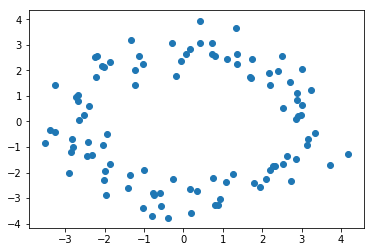

In [6]:
plt.scatter(X[:n,0],X[:n,1])
plt.show()

In [33]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA()
X_pca = pca.fit_transform(X)

kpca = KernelPCA(kernel="poly", degree = 2, fit_inverse_transform=True)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)

In [35]:
X_kpca

array([[ 2.39568250e+00, -3.02029662e-01, -2.75230821e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.59233421e+00, -2.17581652e-01, -2.06159049e+00, ...,
        -9.28372525e-10, -8.89891258e-10, -2.90637368e-10],
       [ 2.35766915e+00, -1.19796133e+00, -2.64720693e+00, ...,
        -1.45530404e-10, -1.92394139e-09, -2.23931792e-10],
       ...,
       [ 8.99096390e-01, -2.72357184e-01, -1.31220129e+00, ...,
        -7.94449986e-10, -7.36663310e-11, -4.44672151e-09],
       [ 4.77882120e+00, -2.07762245e-02, -4.51364284e+00, ...,
        -1.46606830e-10,  8.77429209e-10,  7.62955158e-10],
       [ 2.07632484e+00, -2.38111313e-01, -2.49633324e+00, ...,
         1.35934176e-09,  1.58734768e-09,  2.35275348e-09]])

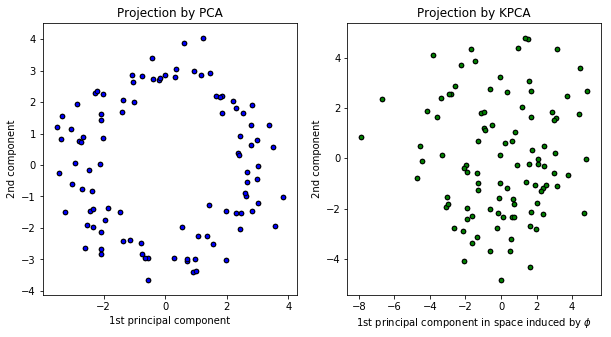

In [43]:
# plot results
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")


plt.subplot(1, 2, 2)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c="orange",
            s=20, edgecolor='k')
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c="green",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.show()

__Exercise 4.__ (50 pts) Below is an import of a reuters data.  I have written a def to process a single file.  Construct a response variable with has three categories, if the topic is 'earn', 'acq', or another category.  Import all of the data and construct a kernel matrix between the documents based on the overlap of words in the body of the document (you can choose the notion of similarity, but try to make it make sense).  Try including into your kernel the overlap between the places.  Use sklearn svm.SVC with this as the precomputed kernel to fit on the data in the TRAIN split and predict on the TEST split.  Plot your ROC and PR curves for predicting 'earn' (versus everything else) and compare several different versions of the kernel.

In [7]:
from lxml import html, etree

In [11]:
import nltk
#nltk.download()
# Download Corpora -> stopwords, Models -> punkt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [12]:
def parse_reu(reu):
    """Parses the etree object and returns a list of dictionary of reuters attr
    Output: {'topics': the topic of the article, 'places': where it is located, 
        'split': training/test split, 'body':the text of the article as a set of words with stopwords removed}
    """
    root= reu.getroot()
    articles = root.body.getchildren()
    stop_words = set(stopwords.words('english'))
    reu_pl = []
    for a in articles:
        reu_parse = {}
        if a.attrib['topics'] != 'YES':
            next
        topics = a.find('topics').findall('d')
        if topics:
            reu_parse['topics'] = [t.text for t in topics]
        else:
            reu_parse['topics'] = []
        places = a.find('places').findall('d')
        if places:
            reu_parse['places'] = [t.text for t in places]
        else:
            reu_parse['places'] = []
        reu_parse['split'] = a.attrib['lewissplit']
        rtxt = a.find('text')
        word_tokens = word_tokenize(rtxt.text_content())
        filtered_sentence = set([w.lower() for w in word_tokens if not w in stop_words])
        reu_parse['body'] = filtered_sentence
        reu_pl.append(reu_parse)
    return reu_pl

In [13]:
reu_names = []
for i in range(10):
    reu_names.append("reuters/reut2-00"+str(i)+".sgm")
for i in range(10,22):
    reu_names.append("reuters/reut2-0"+str(i)+".sgm")

In [14]:
reu_pl = []
for i in reu_names:
    reu = html.parse(i)
    reu_pl= reu_pl+parse_reu(reu)

In [15]:
train = []
test = []
for i in range(len(reu_pl)):
    j = (reu_pl[i]['split'] == 'TRAIN')
    train.append(j)

for i in range(len(reu_pl)):
    j = (reu_pl[i]['split'] == 'TEST')
    test.append(j)

In [16]:
reu_pl_train = [x for x, y in zip(reu_pl, train) if y]
reu_pl_test = [x for x, y in zip(reu_pl, test) if y]

In [17]:
y_test =[]
y_train = []

for i in range(len(reu_pl_train)):
    if 'earn' in reu_pl_train[i]['topics']:
        y_train.append('earn')
    elif 'acq' in reu_pl_train[i]['topics']:
        y_train.append('acq')
    else:
        y_train.append('other')

for i in range(len(reu_pl_test)):
    if 'earn' in reu_pl_test[i]['topics']:
        y_test.append('earn')
    elif 'acq' in reu_pl_test[i]['topics']:
        y_test.append('acq')
    else:
        y_test.append('other')

In [18]:
n_train = len(reu_pl_train)
Train = np.zeros((n_train,n_train))
Places_tr = np.zeros((n_train,n_train))
for i in range(n_train):
    for j in range(i,n_train):
        Train[i,j] = len(set.intersection(reu_pl_train[i]['body'], reu_pl_train[j]['body']))
        Train[j,i] = Train[i,j]
        places_1 = set(reu_pl_train[i]['places'])
        places_2 = set(reu_pl_train[j]['places'])
        Places_tr[i,j] = len(set.intersection(places_1,places_2))
        Places_tr[j,i] = Places_tr[j,i]

In [19]:
n_test = len(reu_pl_test)
Test = np.zeros((n_test,n_train))
Places_te = np.zeros((n_test,n_train))
for i in range(n_test):
    for j in range(n_train):
        Test[i,j] = len(set.intersection(reu_pl_test[i]['body'], reu_pl_train[j]['body']))
        places_1 = set(reu_pl_test[i]['places'])
        places_2 = set(reu_pl_train[j]['places'])
        Places_te[i,j] = len(set.intersection(places_1,places_2))

In [20]:
from sklearn.svm import SVC

In [21]:
# Kernel Matrix is only body
model1 = SVC(kernel='precomputed')
model1.fit(Train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel='precomputed', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [23]:
y_predict1 = model1.predict(Test)
result1 = list(y_predict1 == np.array(y_test))
result1.count(False)

760

In [24]:
y_test_1 = [1 if i == 'earn' else 0 for i in y_test]
y_predict_1 = [1 if i == 'earn' else 0 for i in y_predict1]

In [25]:
### Kernel matrix is body and places
Train_bp = Train + Places_tr
Test_bp = Test + Places_te

In [26]:
model2 = SVC(kernel='precomputed')
model2.fit(Train_bp,y_train)
y_predict2 = model2.predict(Test_bp)
result2 = list(y_predict2 == np.array(y_test))
result2.count(False)

768

In [27]:
y_test_2 = y_test_1
y_predict_2 = [1 if i == 'earn' else 0 for i in y_predict2]

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

fpr_body, tpr_body, _ = roc_curve(y_test_1, y_predict_1)
precision_body, recall_body, _ = precision_recall_curve(y_test_1, y_predict_1)

fpr_bp, tpr_bp, _ = roc_curve(y_test_2, y_predict_2)
precision_bp, recall_bp, _ = precision_recall_curve(y_test_2, y_predict_2)

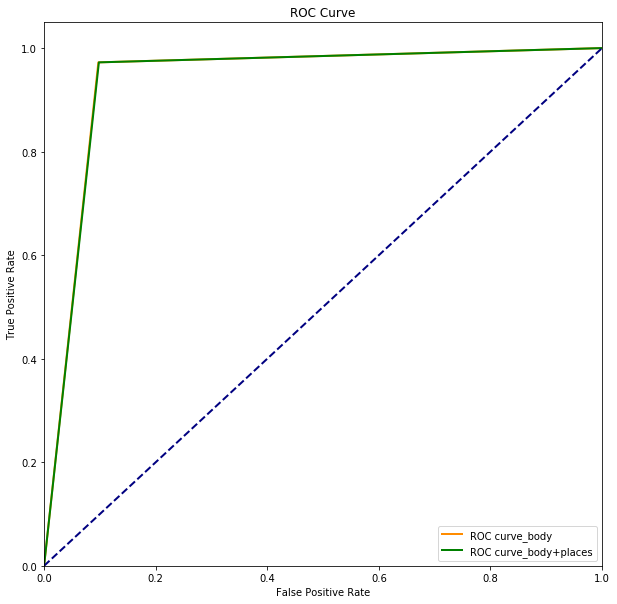

In [31]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr_body, tpr_body, color='darkorange',
         lw=lw, label='ROC curve_body')
plt.plot(fpr_bp, tpr_bp, color='g',
         lw=lw, label='ROC curve_body+places')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Text(0.5,1,'PR Curve')

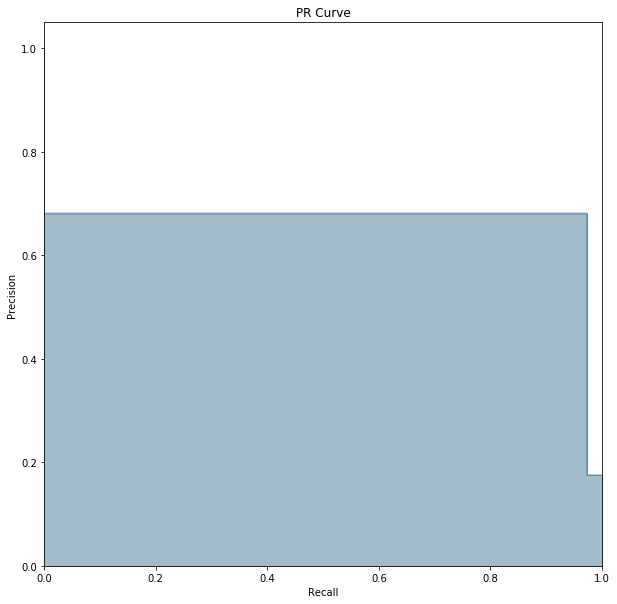

In [32]:
plt.figure(figsize=(10,10))
plt.step(recall_body, precision_body, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall_body, precision_body, step='post', alpha=0.2,
                 color='b')

plt.step(recall_bp, precision_bp, color='g', alpha=0.2,
         where='post')
plt.fill_between(recall_bp, precision_bp, step='post', alpha=0.2,
                 color='g')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR Curve')

From the above graphs, I've tried two different kernel matrix, one is only cover the overlap of bodys; the other one combines the overlap of body and places.

Obviously, there is no obvious difference between these two kernel matrix, also from the ROC curves, they are shown to be adequately predicted.